ref source from which the examples are copied: https://github.com/awslabs/mxnet-model-server/blob/master/docs/README.md

# Serving a model

## Installing necessary libraries
```
pip install mxnet-mkl 
pip install mxnet-model-server

```

## Starting a server with a model
```
mxnet-model-server --start --models squeezenet=https://s3.amazonaws.com/model-server/model_archive_1.0/squeezenet_v1.1.mar
```
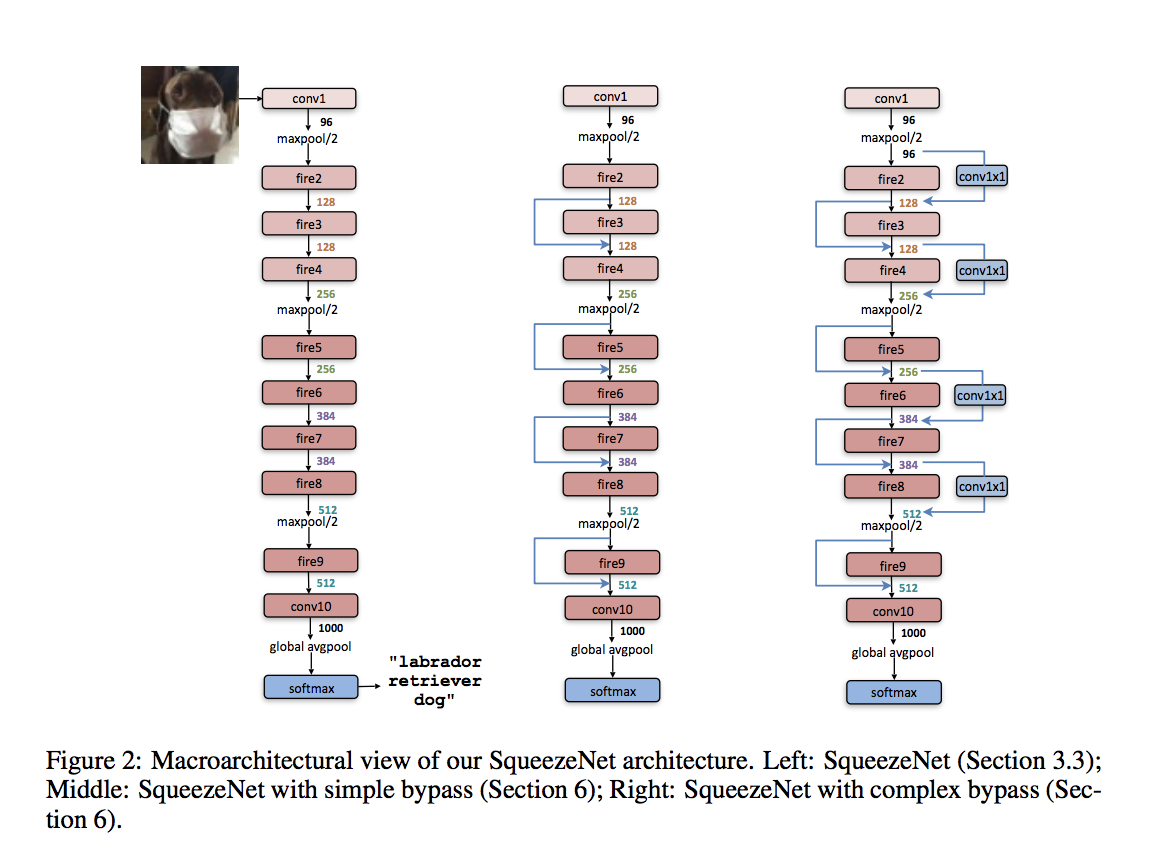
ref: https://medium.com/@smallfishbigsea/notes-of-squeezenet-4137d51feef4

## Downloading an Image
```
curl -O https://s3.amazonaws.com/model-server/inputs/kitten.jpg
```

# Running an Inference
```
curl -X POST http://127.0.0.1:8080/predictions/squeezenet -T kitten.jpg
```
***OUTPUT***
```
[
  {
    "probability": 0.8582232594490051,
    "class": "n02124075 Egyptian cat"
  },
  {
    "probability": 0.09159987419843674,
    "class": "n02123045 tabby, tabby cat"
  },
  {
    "probability": 0.0374876894056797,
    "class": "n02123159 tiger cat"
  },
  {
    "probability": 0.006165083032101393,
    "class": "n02128385 leopard, Panthera pardus"
  },
  {
    "probability": 0.0031716004014015198,
    "class": "n02127052 lynx, catamount"
  }

```

## Stopping the model Server
```
mxnet-model-server --stop
```

## External demos powered by MMS

Here are some example demos of deep learning applications, powered by MMS:

 |  |   ||
|:------:|:-----------:|
| [Product Review Classification](https://thomasdelteil.github.io/TextClassificationCNNs_MXNet/) <img width="325" alt="demo4" src="https://user-images.githubusercontent.com/3716307/48382335-6099ae00-e695-11e8-8110-f692b9ecb831.png"> |[Visual Search](https://thomasdelteil.github.io/VisualSearch_MXNet/) <img width="325" alt="demo1" src="https://user-images.githubusercontent.com/3716307/48382332-6099ae00-e695-11e8-9fdd-17b5e7d6d0ec.png">|
| [Facial Emotion Recognition](https://thomasdelteil.github.io/FacialEmotionRecognition_MXNet/) <img width="325" alt="demo2" src="https://user-images.githubusercontent.com/3716307/48382333-6099ae00-e695-11e8-8bc6-e2c7dce3527c.png"> |[Neural Style Transfer](https://thomasdelteil.github.io/NeuralStyleTransfer_MXNet/) <img width="325" alt="demo3" src="https://user-images.githubusercontent.com/3716307/48382334-6099ae00-e695-11e8-904a-0906cc0797bc.png"> |



# Creating a Model Archive

## Downloading Model Files
```
mkdir squeezenet

curl -o squeezenet https://s3.amazonaws.com/model-server/model_archive_1.0/examples/squeezenet_v1.1/squeezenet_v1.1-symbol.json
curl -o squeezenet https://s3.amazonaws.com/model-server/model_archive_1.0/examples/squeezenet_v1.1/squeezenet_v1.1-0000.params
curl -o squeezenet https://s3.amazonaws.com/model-server/model_archive_1.0/examples/squeezenet_v1.1/signature.json
curl -o squeezenet https://s3.amazonaws.com/model-server/model_archive_1.0/examples/squeezenet_v1.1/synset.txt
```

- **Model Definition (json file)** - contains the layers and overall structure of the neural network.
- **Model Params and Weights (params file)** - contains the parameters and the weights.
- **Model Signature (json file)** - defines the inputs and outputs that MMS is expecting to hand-off to the API.
- **assets (text files)** - auxiliary files that support model inference such as vocabularies, labels, etc. These vary depending on the model.

## Downloading Model Archiver Source
```
cd <the folder you intend to clone the repo>
git clone https://github.com/awslabs/mxnet-model-server.git
```

## Prepare you model service code
```
cp -r mxnet-model-server/examples/model_service_template/* squeezenet/
```

## Package your model into a mar file using model archiver
```
model-archiver --model-name squeezenet_v1.1 --model-path squeezenet --handler mxnet_vision_service:handle
```

```
(production) 4c3275961cd1:sqn cyrusmv$ ls *.mar
squeezenet_v1.1.mar
```

## Serving the model locally
```
mxnet-model-server --start --models squeezenet_local=squeezenet_v1.1.mar --model-store squeeznet
curl -O https://s3.amazonaws.com/model-server/inputs/kitten.jpg
curl -X POST http://127.0.0.1:8080/predictions/squeezenet_local -T kitten.jpg
```

## Serving Multiple Models
```
mxnet-model-server --models resnet=https://s3.amazonaws.com/model-server/model_archive_1.0/resnet-18.mar squeezenet=https://s3.amazonaws.com/model-server/model_archive_1.0/squeezenet_v1.1.mar
```

# Logging and Metrics
```
(production) 4c3275961cd1:Day5 cyrusmv$ ls sqn/logs
```
```
access_log.log		mms_metrics.log		model_metrics.log
mms_log.log		model_log.log
```

```
(production) 4c3275961cd1:Day5 cyrusmv$ tail sqn/logs/mms_metrics.log 
```
```
2019-04-23 06:33:26,003 - MemoryAvailable.Megabytes:6510.97265625|#Level:Host|#hostname:4c3275961cd1.ant.amazon.com,timestamp:1555972406
2019-04-23 06:33:26,003 - MemoryUsed.Megabytes:9027.61328125|#Level:Host|#hostname:4c3275961cd1.ant.amazon.com,timestamp:1555972406
2019-04-23 06:33:26,003 - MemoryUtilization.Percent:60.3|#Level:Host|#hostname:4c3275961cd1.ant.amazon.com,timestamp:1555972406
2019-04-23 06:34:25,985 - CPUUtilization.Percent:0.0|#Level:Host|#hostname:4c3275961cd1.ant.amazon.com,timestamp:1555972465
2019-04-23 06:34:25,985 - DiskAvailable.Gigabytes:193.8106689453125|#Level:Host|#hostname:4c3275961cd1.ant.amazon.com,timestamp:1555972465
2019-04-23 06:34:25,986 - DiskUsage.Gigabytes:269.2597770690918|#Level:Host|#hostname:4c3275961cd1.ant.amazon.com,timestamp:1555972465
2019-04-23 06:34:25,986 - DiskUtilization.Percent:58.1|#Level:Host|#hostname:4c3275961cd1.ant.amazon.com,timestamp:1555972465
2019-04-23 06:34:25,986 - MemoryAvailable.Megabytes:6536.4453125|#Level:Host|#hostname:4c3275961cd1.ant.amazon.com,timestamp:1555972465
2019-04-23 06:34:25,986 - MemoryUsed.Megabytes:9002.94921875|#Level:Host|#hostname:4c3275961cd1.ant.amazon.com,timestamp:1555972465
2019-04-23 06:34:25,986 - MemoryUtilization.Percent:60.1|#Level:Host|#hostname:4c3275961cd1.ant.amazon.com,timestamp:1555972465
```

```
(production) 4c3275961cd1:Day5 cyrusmv$ tail sqn/logs/access_log.log 
```
```
2019-04-23 06:17:39,852 - /127.0.0.1:58717 "POST /predictions/squeezenet HTTP/1.1" 404 16
2019-04-23 06:17:53,059 - /127.0.0.1:58728 "POST /predictions/squeezenet- HTTP/1.1" 404 0
2019-04-23 06:18:09,170 - /127.0.0.1:58730 "POST /predictions/squeezenet-local HTTP/1.1" 404 1
2019-04-23 06:18:23,489 - /127.0.0.1:58737 "POST /predictions/squeezenet-local HTTP/1.1" 404 1
2019-04-23 06:23:36,666 - /127.0.0.1:58878 "GET /ping HTTP/1.1" 200 11
2019-04-23 06:26:44,558 - /127.0.0.1:58954 "GET /ping HTTP/1.1" 200 8
2019-04-23 06:29:33,190 - /127.0.0.1:59037 "GET /ping HTTP/1.1" 200 15
```

# Model Zoo
https://github.com/awslabs/mxnet-model-server/blob/master/docs/model_zoo.md